## 1.- PyTorch Basic Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim import SGD
#from torch.autograd import Variable

$y=\frac{1}{2}x+\epsilon$
Where $\epsilon$ is the noise

In [2]:
x = 20*torch.rand(20,1) 
y = (0.5*x) + 3+torch.normal(mean = 0, std = 1, size = x.shape)

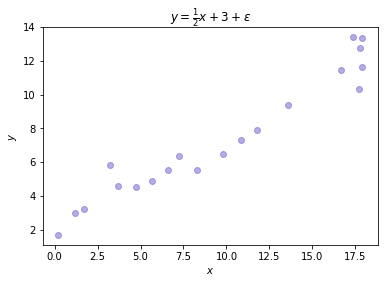

In [3]:
plt.scatter(x[:,0].numpy(),y[:,0].numpy(), color = 'slateblue', alpha = 0.5)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y=\\frac{1}{2}x+3+\epsilon$')
plt.show()

Model
\begin{align}
   f(X;W) = WX 
\end{align}

In [4]:
class mnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = nn.Linear(1,1,bias=True)
        #self.Matrix2 = nn.Linear(1,1,bias=False)
    def forward(self,x):
        x = self.m(x)
        #x = self.Matrix2(x)
        return x

In [5]:
L = nn.MSELoss()
f = mnn()
opt = SGD(f.parameters(), lr=0.001)


In [6]:
losses = []
for _ in range(15):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(f(x), y) #compute loss
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

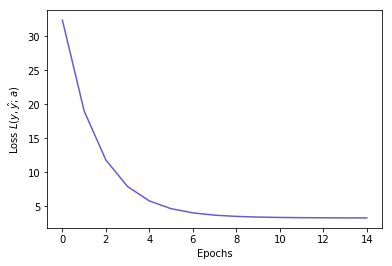

In [7]:
plt.plot(losses, color = 'slateblue')
plt.ylabel('Loss $L(y,\hat{y};a)$')
plt.xlabel('Epochs')
plt.show()

In [8]:
f(x).detach().numpy()

array([[ 4.6906977e+00],
       [ 1.9459637e+00],
       [ 9.5825386e+00],
       [ 1.2476061e+01],
       [-7.5005746e-01],
       [ 1.2817158e+01],
       [ 1.2902142e+01],
       [ 1.5829390e+00],
       [ 5.4545879e+00],
       [ 3.9907920e-01],
       [ 2.7391005e+00],
       [-4.1681528e-03],
       [ 1.2746058e+01],
       [ 3.4747791e+00],
       [ 7.4657235e+00],
       [ 1.1933710e+01],
       [ 1.2885949e+01],
       [ 8.1828890e+00],
       [ 4.1571455e+00],
       [ 6.6350780e+00]], dtype=float32)

In [9]:
y

tensor([[ 6.3621],
        [ 4.5759],
        [ 9.3932],
        [13.3790],
        [ 1.7018],
        [12.7480],
        [13.3642],
        [ 5.8344],
        [ 5.5194],
        [ 3.2179],
        [ 4.5449],
        [ 2.9627],
        [10.3406],
        [ 4.8553],
        [ 7.3002],
        [11.4596],
        [11.6391],
        [ 7.8899],
        [ 5.5115],
        [ 6.4791]])

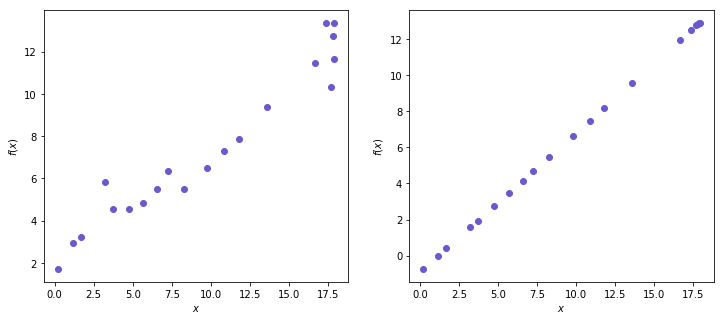

In [10]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.scatter(x.numpy(), y.numpy(), color = 'slateblue')
#plt.title('$f_{3}(x) = 4/(1+x^{2})$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.subplot(1,2,2)
plt.scatter(x.numpy(), f(x).detach().numpy(), color = 'slateblue')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

In [11]:
#x1 = torch.from_numpy(np.linspace(-1,1,10).reshape(-1,1))
x1 = torch.tensor([[0],[10],[20]]).float()

In [12]:
f(x1)

tensor([[-0.9184],
        [ 6.7999],
        [14.5182]], grad_fn=<AddmmBackward0>)

In [13]:
print(f.m.bias)
print(f.m.weight)

Parameter containing:
tensor([-0.9184], requires_grad=True)
Parameter containing:
tensor([[0.7718]], requires_grad=True)


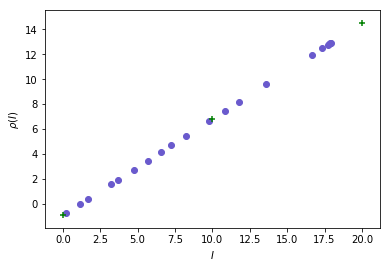

In [15]:
plt.scatter(x.numpy(), f(x).detach().numpy(), color = 'slateblue')
plt.scatter(x1.numpy(), f(x1).detach().numpy(), color = 'green', marker = '+')
plt.xlabel('$I$')
plt.ylabel('$\\rho(I)$')
plt.show()

## 2.- Logistic Regression

In [16]:
def circle(center=[0,0], radius = [0,1], n=100, label = 0,  noise = True):
    dat = []
    limx = [-np.sqrt(max(radius)), np.sqrt(max(radius))]
    limy = [-np.sqrt(max(radius)), np.sqrt(max(radius))]
    
    for i in range(n):
        x = (limx[1] - limx[0])* np.random.rand() + limx[0] + center[0] 
        y = (limy[1] - limy[0])* np.random.rand() + limy[0] + center[1]
        
        if min(radius) <= (x - center[0])**2 + (y - center[1])**2 <= max(radius):
            dat.append([x,y])
    
    data = np.asarray(dat)
    
    if noise == True:
        data += np.random.normal(0,1, size = data.shape ) 
        
    return np.concatenate( ( data, label*np.ones(shape = (data.shape[0],1))), axis =1  )

In [17]:
c1 = circle(center=[-1,-2], radius = [0,1], n = 50, label = 0, noise = False)
c2 = circle(center=[1,2], radius = [0,1], n = 50, label = 1, noise = False)

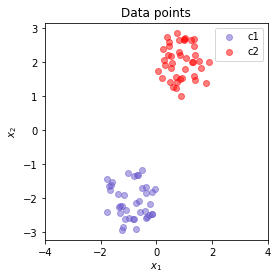

In [18]:
plt.figure(figsize = (4,4))
plt.scatter(c1[:,0], c1[:,1], color = 'slateblue', alpha = 0.5, label = 'c1')
plt.scatter(c2[:,0], c2[:,1], color = 'red', alpha = 0.5, label = 'c2')
plt.title('Data points')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.xlim(-4,4)
plt.legend(loc = 'best')
plt.show()

In [19]:
c = np.concatenate( (c1,c2), axis = 0)
np.random.shuffle(c)

In [20]:
#cdata = torch.from_numpy(c[:,:2]).type(torch.FloatTensor)
#clabels = torch.from_numpy(c[:,2]).type(torch.FloatTensor).reshape(-1,1)
cdata = torch.tensor(c[:,:2])
clabels = torch.tensor(c[:,2]).reshape(-1,1)

In [21]:
#torch.from_numpy(c[:,2]).type(torch.long)

In [22]:
cdata.dtype

torch.float64

In [23]:
clabels.shape

torch.Size([81, 1])

In [24]:
clabels.dtype

torch.float64

In [25]:
#clabels

In [26]:
#clabels = torch.nn.functional.one_hot(torch.from_numpy(c[:,2].astype(np.int64)), num_classes = 2)
#torch.nn.functional.one_hot(torch.as_tensor(c[:,2].astype(int)).long(), num_classes = 2)

In [27]:
class mnnl(nn.Module):
    def __init__(self):
        super(mnnl, self).__init__()
        self.m = nn.Linear(2,1,bias=True)
        #self.Matrix2 = nn.Linear(1,1,bias=False)
    def forward(self,x):
        x = torch.sigmoid(self.m(x))
        #x = self.Matrix2(x)
        # Many non-linearities and other functions are in torch.nn.functional
        #return torch.nn.functional.log_softmax(x, dim = 1)
        return x

In [28]:
#L = nn.NLLLoss()
L = nn.BCELoss()
g = mnnl()
opt = SGD(g.parameters(), lr=0.1)

In [29]:
#g(cdata)

In [30]:
losses = []
for _ in range(15):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(g(cdata.float()), clabels.float() ) #compute loss
    #loss_values = L(g(cdata), clabels)
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

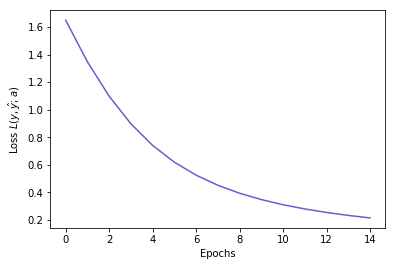

In [31]:
plt.plot(losses, color = 'slateblue')
plt.ylabel('Loss $L(y,\hat{y};a)$')
plt.xlabel('Epochs')
plt.show()

In [32]:
print(g.m.bias)
print(g.m.weight)

Parameter containing:
tensor([0.4281], requires_grad=True)
Parameter containing:
tensor([[-0.0707,  0.8269]], requires_grad=True)


In [33]:
t1 = torch.tensor([[-1.,-2.],[1,2],[0,0],[-2,-2],[2,2]])

In [34]:
g(t1)

tensor([[0.2396],
        [0.8820],
        [0.6054],
        [0.2527],
        [0.8744]], grad_fn=<SigmoidBackward0>)

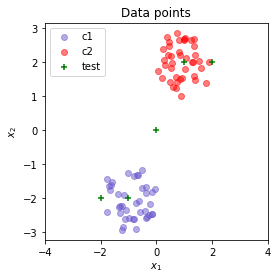

In [35]:
plt.figure(figsize = (4,4))
plt.scatter(c1[:,0], c1[:,1], color = 'slateblue', alpha = 0.5, label = 'c1')
plt.scatter(c2[:,0], c2[:,1], color = 'red', alpha = 0.5, label = 'c2')
plt.scatter(t1[:,0], t1[:,1], color = 'green', marker = '+', label = 'test')
plt.title('Data points')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.xlim(-4,4)
plt.legend(loc = 'best')
plt.show()

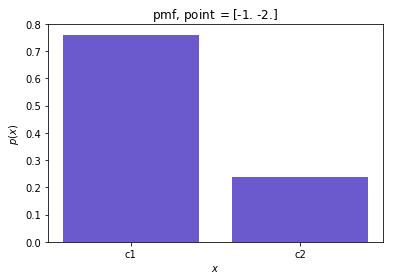

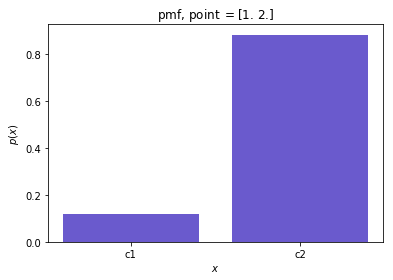

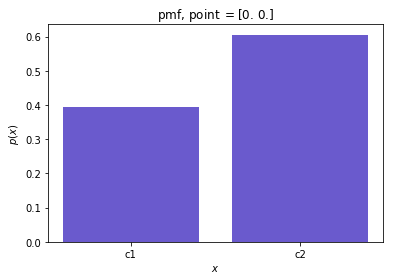

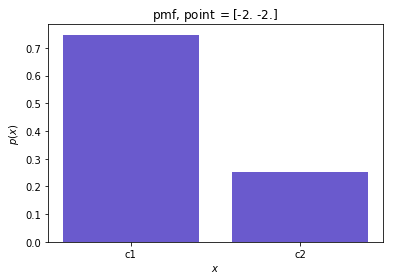

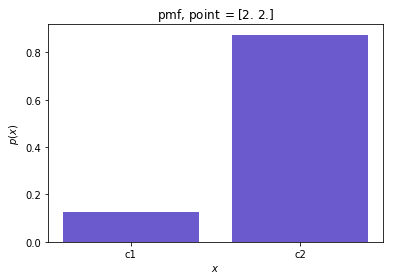

In [36]:
classes = ['c1','c2']
for t in t1:
    count = [1.-g(t).detach().numpy()[0],g(t).detach().numpy()[0]]
    plt.bar(classes, count, color = 'slateblue')
    plt.title('pmf, point $=$' + str(t.numpy()))
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.show()
    
    #print(t.numpy(),g(t).detach().numpy()[0] )

## 3.- Softmax regression

In [37]:
c1 = circle(center=[0,0], radius = [0,4**2], n = 50, label = 0, noise = False)
c2 = circle(center=[8,0], radius = [0,2**2], n = 50, label = 1, noise = False)
c3 = circle(center=[13,0], radius = [0,1], n = 50, label = 2, noise = False)

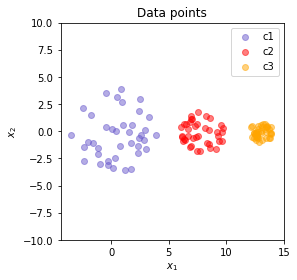

In [38]:
plt.figure(figsize = (4,4))
plt.scatter(c1[:,0], c1[:,1], color = 'slateblue', alpha = 0.5, label = 'c1')
plt.scatter(c2[:,0], c2[:,1], color = 'red', alpha = 0.5, label = 'c2')
plt.scatter(c3[:,0], c3[:,1], color = 'orange', alpha = 0.5, label = 'c3')
plt.title('Data points')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.ylim(-10,10)
plt.legend(loc = 'best')
plt.show()

In [39]:
c = np.concatenate( (c1,c2,c3), axis = 0)
np.random.shuffle(c)

In [40]:
print(c[:10,:])

[[ 6.45482050e+00 -8.16555332e-01  1.00000000e+00]
 [ 1.30454299e+01  1.22317940e-02  2.00000000e+00]
 [ 1.25692359e+01 -1.55724081e-01  2.00000000e+00]
 [ 1.23759305e+01 -5.97533948e-01  2.00000000e+00]
 [ 9.26362953e+00 -4.63777617e-01  1.00000000e+00]
 [ 7.98899764e-01 -1.31993644e+00  0.00000000e+00]
 [ 1.26378279e+01 -3.75073774e-01  2.00000000e+00]
 [-4.69008650e-01  4.38293023e-01  0.00000000e+00]
 [ 1.68181671e+00 -3.43986780e+00  0.00000000e+00]
 [ 9.12373062e+00 -1.59639005e+00  1.00000000e+00]]


In [41]:
#torch.tensor(c[:,2], dtype = torch.long)

In [42]:
cdata = cdata = torch.tensor(c[:,:2])
clabels = torch.nn.functional.one_hot(torch.tensor(c[:,2], dtype = torch.long), num_classes = 3)

In [43]:
clabels[:10,:] 

tensor([[0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0]])

In [44]:
class mnns(nn.Module):
    def __init__(self):
        super(mnns, self).__init__()
        self.m = nn.Linear(2,3,bias=True)
        self.s = nn.Softmax(dim = 1)
        #self.Matrix2 = nn.Linear(1,1,bias=False)
    def forward(self,x):
        x = self.s(self.m(x))
        return x

In [45]:
L = nn.CrossEntropyLoss()
h = mnns()
opt = SGD(h.parameters(), lr=0.01)

In [46]:
#h(cdata.float())

In [47]:
losses = []
for _ in range(20):
    opt.zero_grad() # flush previous epoch's gradient
    loss_value = L(h(cdata.float()), clabels.float() ) #compute loss
    #loss_values = L(g(cdata), clabels)
    loss_value.backward() # compute gradient
    opt.step() # Perform iteration using gradient above
    losses.append(loss_value.item())

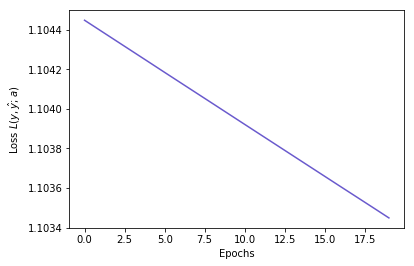

In [48]:
plt.plot(losses, color = 'slateblue')
plt.ylabel('Loss $L(y,\hat{y};a)$')
plt.xlabel('Epochs')
plt.show()

In [49]:
t2 = torch.tensor([[0.,5.],[-4.,0],[0.,0.],[4.,0.],[5.,0.],[6.,0.],[7.,0.],
                   [8.,2.5],[8.,0.],[10.,0.],[11.,0.],[12.,0],[13.,0.],[14.,0],
                   [13.,1.],[15.,0.]])

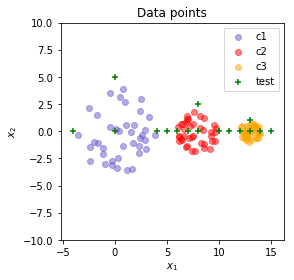

In [50]:
plt.figure(figsize = (4,4))
plt.scatter(c1[:,0], c1[:,1], color = 'slateblue', alpha = 0.5, label = 'c1')
plt.scatter(c2[:,0], c2[:,1], color = 'red', alpha = 0.5, label = 'c2')
plt.scatter(c3[:,0], c3[:,1], color = 'orange', alpha = 0.5, label = 'c3')
plt.scatter(t2[:,0], t2[:,1], color = 'green', marker = '+', label = 'test')
plt.title('Data points')
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.ylim(-10,10)
plt.legend(loc = 'best')
plt.show()

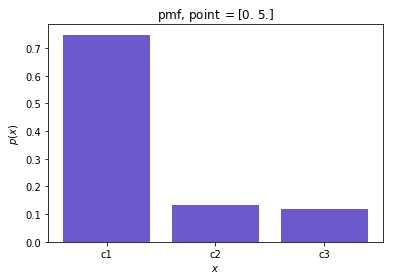

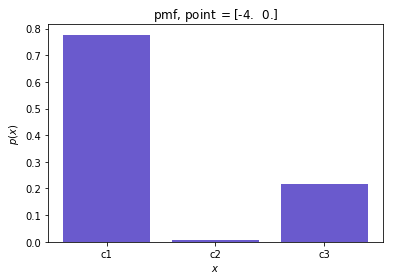

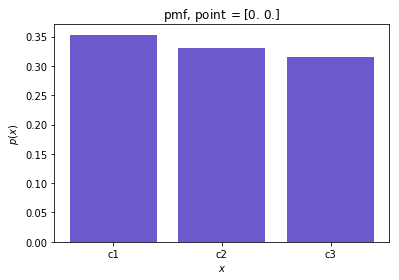

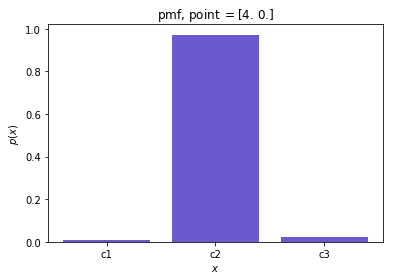

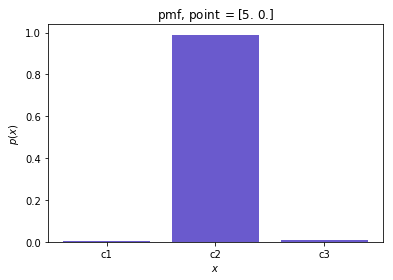

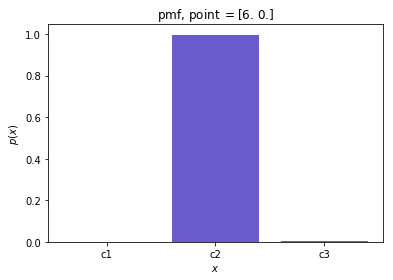

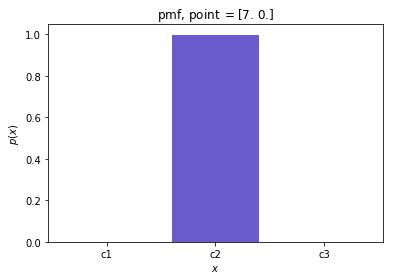

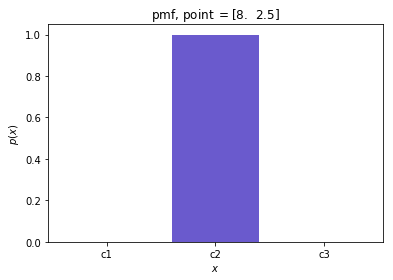

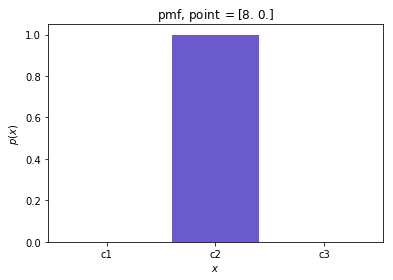

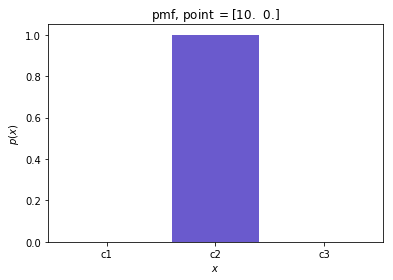

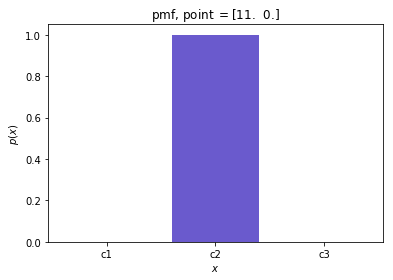

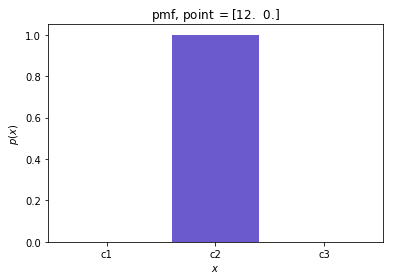

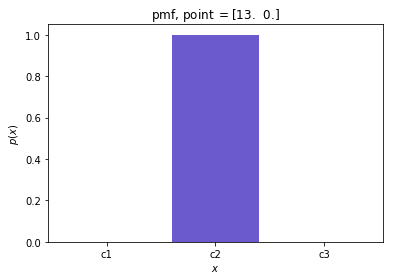

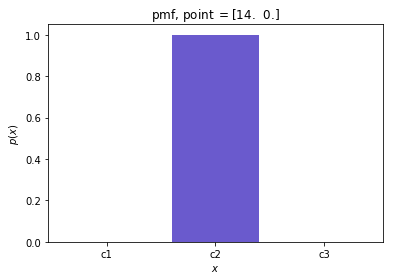

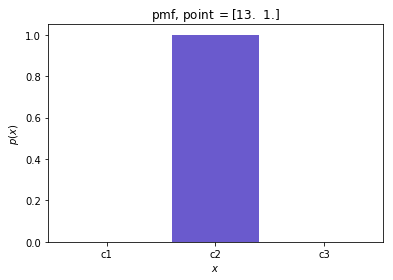

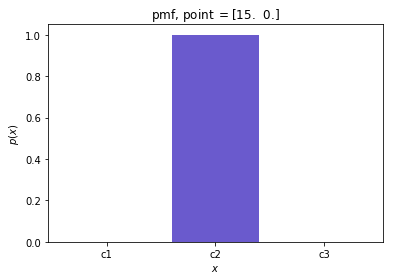

In [51]:
classes = ['c1','c2','c3']

for point,t in zip(t2,h(t2)):
    count = t.detach().numpy()
    plt.bar(classes, count, color = 'slateblue')
    plt.title('pmf, point $=$' + str(point.numpy()))
    plt.xlabel('$x$')
    plt.ylabel('$p(x)$')
    plt.show()
    
    #print(t.numpy(),g(t).detach().numpy()[0] )